In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.optimizers import SGD
from sklearn.datasets import load_wine

# загрузка данных
iris = load_wine()
X = iris.data
y = iris.target

# разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [57]:
# Генерация синтетических данных
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=4, random_state=42, flip_y=0.9, class_sep=0.8, weights=[0.97,0.8,0.95])
# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
def train_cnn(X_train, y_train, X_test, y_test):
    # Reshape the data to match the expected input shape of Conv1D layer
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    # Create the CNN model
    model = Sequential()
    model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile and train the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=0)
    
    return model, history

def train_snn(X_train, y_train, X_test, y_test):
    # Создание модели стохастической нейронной сети
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Компиляция и обучение модели
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=0)
    
    return model, history


def train_mlp(X_train, y_train, X_test, y_test):
    # Создание модели многослойной нейронной сети
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Компиляция и обучение модели
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=0)
    
    return model, history


def plot_learning_curves(history):
    # Отображение графика обучения модели
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


def evaluate_model(model, X_test, y_test):
    # Оценка точности модели
    y_pred = np.argmax(model.predict(X_test) ,axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


2/2 [==============================] - 0s 8ms/step
Сверточная нейронная сеть точность: 0.42592592592592593


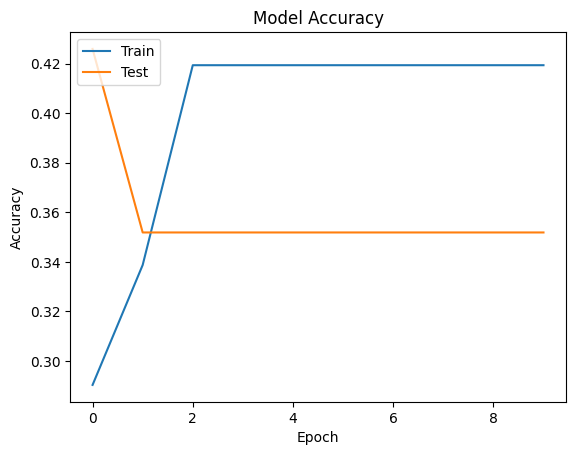

2/2 [==============================] - 0s 5ms/step
Стохастическая нейронная сеть точность: 0.42592592592592593


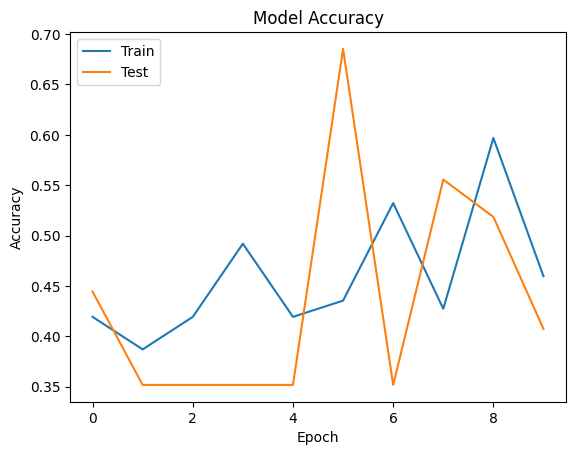

2/2 [==============================] - 0s 9ms/step
Многослойная нейронная сеть точность: 0.42592592592592593


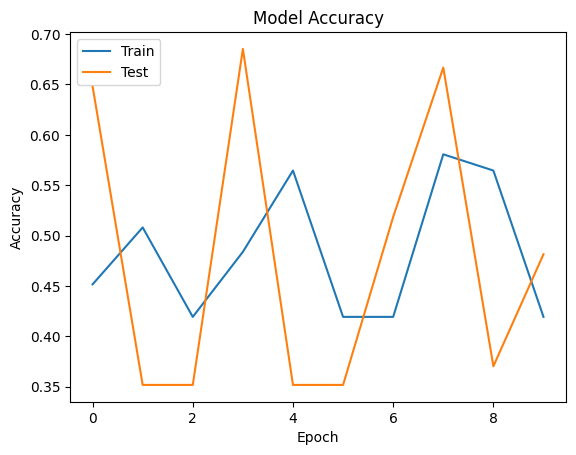

In [71]:
# Обучение и оценка сверточной нейронной сети
cnn_model, cnn_history = train_cnn(X_train, y_train, X_test, y_test)
cnn_accuracy = evaluate_model(cnn_model, X_test, y_test)
print("Сверточная нейронная сеть точность:", cnn_accuracy)
plot_learning_curves(cnn_history)

# Обучение и оценка стохастической нейронной сети
snn_model, snn_history = train_snn(X_train, y_train, X_test, y_test)
snn_accuracy = evaluate_model(snn_model, X_test, y_test)
print("Стохастическая нейронная сеть точность:", snn_accuracy)
plot_learning_curves(snn_history)

# Обучение и оценка многослойной нейронной сети
mlp_model, mlp_history = train_mlp(X_train, y_train, X_test, y_test)
mlp_accuracy = evaluate_model(mlp_model, X_test, y_test)
print("Многослойная нейронная сеть точность:", mlp_accuracy)
plot_learning_curves(mlp_history)

In [72]:
cnn_model.summary()
snn_model.summary()
mlp_model.summary()

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_23 (Conv1D)          (None, 11, 32)            128       
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, 5, 32)            0         
 g1D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 160)               0         
                                                                 
 dense_170 (Dense)           (None, 1)                 161       
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Out